<a href="https://colab.research.google.com/github/Gus-1003/Behavioural-Neuroscience/blob/main/application_TBNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Please copy this notebook into your google drive and provide the link to your copy with solutions with your application!!!

The goal of this notebook is to test your problem solving skills more than to test your python knowledge.

If you don't know a specific function, please write how you would approach solving this specific exercise in pseudocode (logical operations)

This test is just a small part of the application process and your performance here is not be all end all. It provides us with information about your python experience and data analysis related problem solving skills. Also feel free to google stuff and use chatgpt etc. - these are all tools that can help you - just remember to understand the solution you provide - in the end you should be able to implement it yourself.

Results by Gustavo Maciel

In [113]:
import pandas as pd
import numpy as np
import gdown
import plotly.express as px # you can use another preffered visualization library
import matplotlib.pyplot as plt

from natsort import natsorted

## Exercise 1
Given an array of integers:
1. Find indices of values in `arr` that are lower than 5
2. Multiply those indices by 10.
3. Calculate the difference between consecutive values in the resulting array

In [114]:
arr = np.random.randint(0, 9, 10)
print(arr)

[1 4 0 4 5 7 5 0 3 1]


### 1st version:

In [115]:
#solution excercise 1:
result = []

for i, value in enumerate(arr):
  if value < 5:
    result.append(i)

print("values found: ", result)

values found:  [0, 1, 2, 3, 7, 8, 9]


In [116]:
result_multiplication = []

for value in result:
  product = value * 10
  result_multiplication.append(product)

print("values found: ", result_multiplication)

values found:  [0, 10, 20, 30, 70, 80, 90]


In [117]:
result_subtraction = []

for i in range(1, len(result_multiplication)):
  diffrence = result_multiplication[i] - result_multiplication[i-1]
  result_subtraction.append(diffrence)

print("values found: ", result_subtraction)

values found:  [10, 10, 10, 40, 10, 10]


### 2st version:

In [118]:
result = []
result = [i for i, value in enumerate(arr) if value < 5]
print("values found: ", result)

values found:  [0, 1, 2, 3, 7, 8, 9]


In [119]:
result_multiplication = []
result_multiplication = [value*10 for value in result]
print("values found: ", result_multiplication)

values found:  [0, 10, 20, 30, 70, 80, 90]


In [120]:
result_subtraction = []
result_subtraction = [b - a for a, b in zip(result_multiplication, result_multiplication[1:])]
print("values found: ", result_subtraction)

values found:  [10, 10, 10, 40, 10, 10]


## Exercise 2

Given a 2D numpy array that contains number of entries to cage per hour create a pandas DataFrame with columns and indices:
```python
columns = ["cage_1", "cage_2", "cage_3", "cage_4"]
index = ["hour_0", "hour_1", ..., "hour_23"]
```
use list comprehension to create them.

Plot a barplot with the number of cumulative sum of entries to each cage per hour. Resulting plot should look something like this:

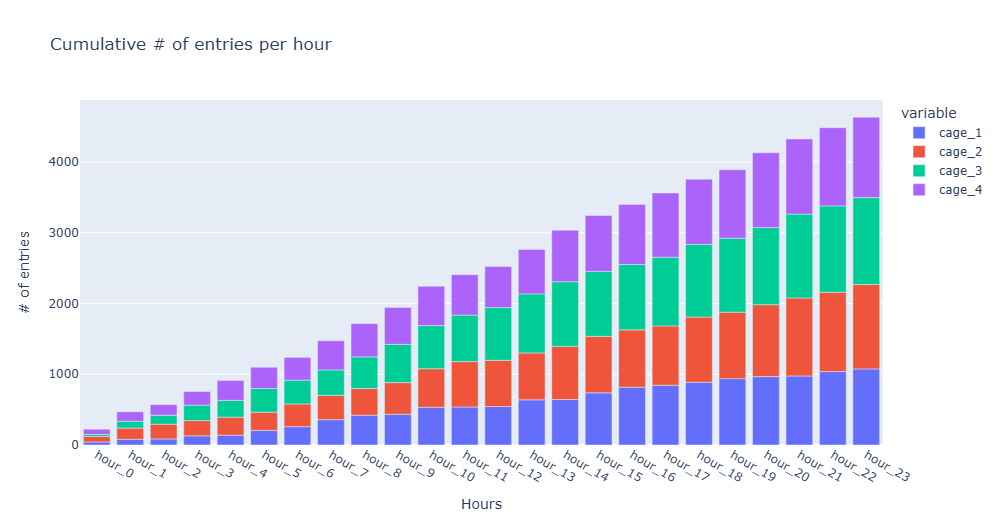


In [121]:
arr_2d = np.random.randint(0, 100, 24*4).reshape(24, -1)
print(arr_2d)

[[79  4 30 74]
 [34 30 15 52]
 [42 39 36 83]
 [86  2 35 85]
 [51 41 10 23]
 [83  4 17 38]
 [24  0 40 51]
 [46 74 88 28]
 [39 65 27 32]
 [56 13 49 78]
 [64 55 54 78]
 [24 81 80  8]
 [42 74  8 35]
 [23  6 52 87]
 [39 20 78 16]
 [84 83 68 99]
 [66 82 75 65]
 [91 69 32 66]
 [51 47 15 65]
 [ 0 81 43 88]
 [60 56  6 90]
 [50 56 67 71]
 [76 54 28 61]
 [90 62 99 51]]


         cage_1  cage_2  cage_3  cage_4
hour_0       79       4      30      74
hour_1       34      30      15      52
hour_2       42      39      36      83
hour_3       86       2      35      85
hour_4       51      41      10      23
hour_5       83       4      17      38
hour_6       24       0      40      51
hour_7       46      74      88      28
hour_8       39      65      27      32
hour_9       56      13      49      78
hour_10      64      55      54      78
hour_11      24      81      80       8
hour_12      42      74       8      35
hour_13      23       6      52      87
hour_14      39      20      78      16
hour_15      84      83      68      99
hour_16      66      82      75      65
hour_17      91      69      32      66
hour_18      51      47      15      65
hour_19       0      81      43      88
hour_20      60      56       6      90
hour_21      50      56      67      71
hour_22      76      54      28      61
hour_23      90      62      99      51


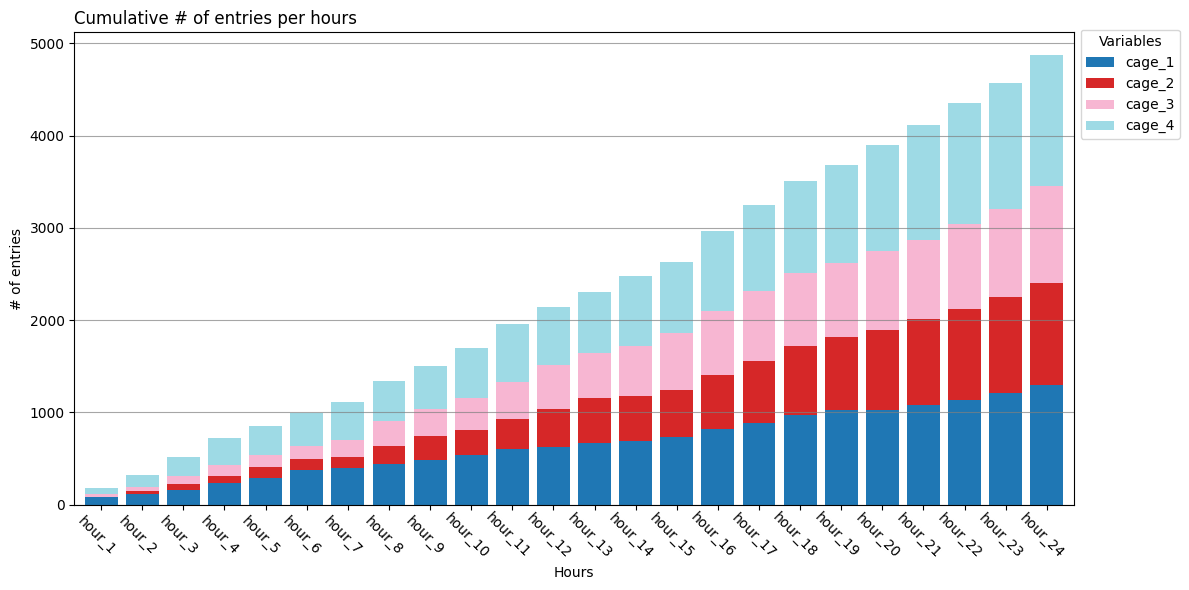

In [122]:
#solution excercise 2:
df = pd.DataFrame(arr_2d, columns=["cage_1", "cage_2", "cage_3", "cage_4"])
df.index = [f"hour_{i}" for i in range(24)]
df_cumsum = df.cumsum()

print(df)

ax = df_cumsum.plot(kind="bar", stacked=True, figsize=(12, 6), cmap="tab20", width=0.8)

ax.set_title("Cumulative # of entries per hours", loc='left')
ax.set_xlabel("Hours")
ax.set_ylabel("# of entries")

ax.set_xticklabels([f"hour_{i}" for i in range(1, 25)], rotation=-45, ha='center', va='top', rotation_mode='anchor')
ax.xaxis.set_tick_params(pad=15)

ax.legend(title="Variables", loc="center left", bbox_to_anchor=(1, 0.89))

ax.grid(axis='y', color='gray', alpha=0.7)

plt.tight_layout()
plt.show()

## Exercise 3

Given a pandas MultiIndex DataFrame:
1. Extract a column called `distance` for fly called `fly3`
2. Calculate speed in pixels per second - recording was done in 50 Hz, each row corresponds to one frame of the video, values correspond .
3. Check most common (mode) location of the fly when its speed is > 1

In [123]:
# Generate DataFrame
experiment = ["Best_fruit_fly_experiment"]
flies = [f"fly{i}" for i in range(4)]
metric = ["distance", "location"]

index = pd.MultiIndex.from_product([experiment, flies, metric], names=["experiment", "flies", "metric"])

temp = []

for fly in flies:
  temp.append(43 + np.random.sample(1000) * 20)
  temp.append(np.random.randint(0,2,1000))

data = np.array(temp).T

df = pd.DataFrame(data, columns=index)
df

experiment Best_fruit_fly_experiment                                          \
flies                           fly0                fly1                fly2   
metric                      distance location   distance location   distance   
0                          53.811998      0.0  45.409575      0.0  59.858521   
1                          47.347586      1.0  60.297740      1.0  57.155605   
2                          52.249446      1.0  43.034953      0.0  49.574191   
3                          49.537645      1.0  59.162260      1.0  60.017842   
4                          56.458061      1.0  60.827617      0.0  53.662423   
..                               ...      ...        ...      ...        ...   
995                        50.670483      1.0  55.267511      1.0  48.666982   
996                        62.619821      0.0  45.729907      0.0  48.296764   
997                        52.549501      0.0  46.045530      0.0  44.079813   
998                        50.002232      1.0  48.484535      1.0  58.483399   
999                        53.559015      1.0  51.219370      1.0  48.089004   

experiment                               
flies                     fly3           
metric     location   distance location  
0               0.0  43.532953      1.0  
1               0.0  62.476947      0.0  
2               0.0  56.891917      0.0  
3               0.0  43.057112      0.0  
4               0.0  53.538854      1.0  
..              ...        ...      ...  
995             1.0  61.398344      1.0  
996             1.0  49.079655      1.0  
997             1.0  47.558674      1.0  
998             0.0  49.458793      0.0  
999             1.0  61.928646      0.0  

[1000 rows x 8 columns]

In [124]:
df.columns = [f"{fly}_{metric}" for experiment, fly, metric in df.columns]
df

,fly0_distance,fly0_location,fly1_distance,fly1_location,fly2_distance,fly2_location,fly3_distance,fly3_location
0,53.811998,0.0,45.409575,0.0,59.858521,0.0,43.532953,1.0
1,47.347586,1.0,60.297740,1.0,57.155605,0.0,62.476947,0.0
2,52.249446,1.0,43.034953,0.0,49.574191,0.0,56.891917,0.0
3,49.537645,1.0,59.162260,1.0,60.017842,0.0,43.057112,0.0
4,56.458061,1.0,60.827617,0.0,53.662423,0.0,53.538854,1.0
...,...,...,...,...,...,...,...,...
995,50.670483,1.0,55.267511,1.0,48.666982,1.0,61.398344,1.0
996,62.619821,0.0,45.729907,0.0,48.296764,1.0,49.079655,1.0
997,52.549501,0.0,46.045530,0.0,44.079813,1.0,47.558674,1.0
998,50.002232,1.0,48.484535,1.0,58.483399,0.0,49.458793,0.0


In [125]:
#solution excercise 3:
processed_df = pd.DataFrame(df[['fly3_distance', 'fly3_location']])

sampling_rate = 50
processed_df['time'] = df.index / sampling_rate
processed_df['speed(pxl/s)'] = np.where(processed_df['time'] > 0, processed_df['fly3_distance'] / processed_df['time'], 0)
print(processed_df)

filtered_df = processed_df[processed_df['speed(pxl/s)'] > 1]
print(filtered_df)

mode_value = filtered_df['fly3_location'].mode()[0]

print(mode_value)

     fly3_distance  fly3_location   time  speed(pxl/s)
0        43.532953            1.0   0.00      0.000000
1        62.476947            0.0   0.02   3123.847341
2        56.891917            0.0   0.04   1422.297925
3        43.057112            0.0   0.06    717.618532
4        53.538854            1.0   0.08    669.235676
..             ...            ...    ...           ...
995      61.398344            1.0  19.90      3.085344
996      49.079655            1.0  19.92      2.463838
997      47.558674            1.0  19.94      2.385089
998      49.458793            0.0  19.96      2.477895
999      61.928646            0.0  19.98      3.099532

[1000 rows x 4 columns]
     fly3_distance  fly3_location   time  speed(pxl/s)
1        62.476947            0.0   0.02   3123.847341
2        56.891917            0.0   0.04   1422.297925
3        43.057112            0.0   0.06    717.618532
4        53.538854            1.0   0.08    669.235676
5        52.552452            0.0   0.10

## Exercise 4

Given a binary array find start indices and end indices of sequences of 1s and the length of those.

For example, given:
```python
binary_arr = [0,0,0,1,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1]
```

extract:
```python
starts = [3, 9, 17]
stops = [6, 12, 18]
lengths = [4, 4, 2]
```

Write the code into a function that would accept any binary array

In [126]:
binary_arr = [0,0,0,1,1,1,1,0,0,1,1,1,1,0,0,0,0,1,1]

In [127]:
#solution excercise 4:
def star_end_exp(arr:list)->list:
  cont = 0
  lengths = []
  stops = []
  starts = []

  for i in range(1, len(arr)):
      if arr[i-1] == arr[i]:
          cont += 1
      elif arr[i-1] < arr[i]:
          starts.append(i)
          cont = 1
      else:
          lengths.append(cont)
          stops.append(i-1)
          cont = 1

  lengths.append(cont)
  stops.append(len(arr)-1)

  return starts, stops, lengths

starts, stops, lengths = star_end_exp(binary_arr)
print(starts)
print(stops)
print(lengths)

[3, 9, 17]
[6, 12, 18]
[4, 4, 2]


## Exercise 5
Download the file. Read it into a pandas dataframe.

This is data from a 4 cage system with pose estimation of 12 mice stored in a MultiIndex DataFrame.

Given information listed below create a box plot of average time spent during each visit per animal for Cage 1.

1.  Cage 1 is located in X > 690 and Y > 650
2.  Use the `Nose` keypoint to establish presence in the ROI
3.  Video was recorded at 50Hz
4.  Filter out entries shorter than 1 second

Output plot should look something like this:

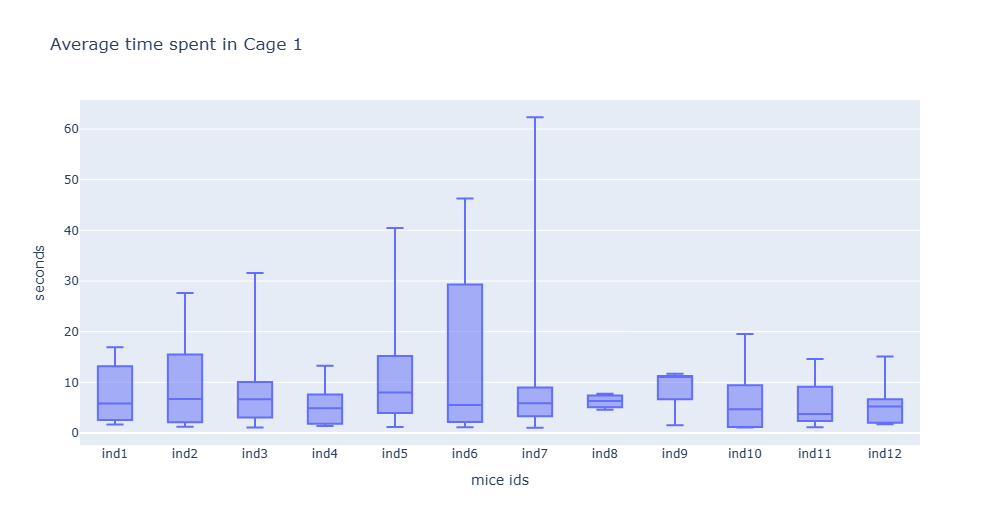

In [128]:
# Downloads the file into the notebook environment and load into a pandas df
!gdown https://drive.google.com/uc?id=1E3GQ1cctLZ5XRdgwC8y3Cdac1GRSQjDk

df = pd.read_hdf("/content/6h_rec_startDLC_dekr_w18_the_future_of_EcohabNov22shuffle1_80_el_filtered.h5")
df.columns = [f"{individuals}_{bodyparts}_{metric}" for experiment, individuals, bodyparts, metric in df.columns]
df.head(25)

Downloading...
From: https://drive.google.com/uc?id=1E3GQ1cctLZ5XRdgwC8y3Cdac1GRSQjDk
To: /content/6h_rec_startDLC_dekr_w18_the_future_of_EcohabNov22shuffle1_80_el_filtered.h5
100% 73.5M/73.5M [00:01<00:00, 58.0MB/s]


,ind1_Ear_left_x,ind1_Ear_left_y,ind1_Ear_left_likelihood,ind1_Ear_right_x,ind1_Ear_right_y,ind1_Ear_right_likelihood,ind1_Nose_x,ind1_Nose_y,ind1_Nose_likelihood,ind1_Dorsal1_x,...,ind12_Shoulder_left_likelihood,ind12_Shoulder_right_x,ind12_Shoulder_right_y,ind12_Shoulder_right_likelihood,ind12_Hip_left_x,ind12_Hip_left_y,ind12_Hip_left_likelihood,ind12_Hip_right_x,ind12_Hip_right_y,ind12_Hip_right_likelihood
0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
from scipy.ndimage import gaussian_filter1d

column_groups = {}

sampling_rate = 50

for col in df.columns:
  prefix = col.split("_")[0]
  if prefix not in column_groups:
    column_groups[prefix] = []
  column_groups[prefix].append(col)

dfs = {}

for key, columns in column_groups.items():
  temp_df = df[columns].copy()
  temp_df.insert(0, "time", temp_df.index / sampling_rate)
  temp_df.insert(0, "id", key)
  temp_df.columns = ["id", "time"] + [col[len(key) + 1:] for col in columns]
  temp_df = temp_df.reset_index(drop=True)
  temp_df['Nose_x'] = gaussian_filter1d(temp_df['Nose_x'], sigma=2, mode='nearest')
  temp_df['Nose_y'] = gaussian_filter1d(temp_df['Nose_y'], sigma=2, mode='nearest')
  dfs[key] = temp_df

structured_df = pd.concat(dfs.values(), ignore_index=True)

select_df = structured_df[['time', 'id', 'Nose_x', 'Nose_y', 'Nose_likelihood']]
select_df

,time,id,Nose_x,Nose_y,Nose_likelihood
0,0.00,ind1,NaN,NaN,1.000000
1,0.02,ind1,NaN,NaN,1.000000
2,0.04,ind1,NaN,NaN,1.000000
3,0.06,ind1,NaN,NaN,1.000000
4,0.08,ind1,NaN,NaN,1.000000
...,...,...,...,...,...
179707,299.42,ind12,218.015106,402.679086,0.896809
179708,299.44,ind12,218.951378,398.939992,0.871818
179709,299.46,ind12,219.499964,395.822543,0.879674
179710,299.48,ind12,219.768915,393.594805,0.899376


In [160]:
from scipy.ndimage import gaussian_filter1d

position_df = select_df.copy()

position_df['cage1'] = np.where((position_df['Nose_x'] > 690) & (position_df['Nose_y'] > 650), 1, 0)

position_df.reset_index(drop=True)

position_df

,time,id,Nose_x,Nose_y,Nose_likelihood,cage1
0,0.00,ind1,NaN,NaN,1.000000,0
1,0.02,ind1,NaN,NaN,1.000000,0
2,0.04,ind1,NaN,NaN,1.000000,0
3,0.06,ind1,NaN,NaN,1.000000,0
4,0.08,ind1,NaN,NaN,1.000000,0
...,...,...,...,...,...,...
179707,299.42,ind12,218.015106,402.679086,0.896809,0
179708,299.44,ind12,218.951378,398.939992,0.871818,0
179709,299.46,ind12,219.499964,395.822543,0.879674,0
179710,299.48,ind12,219.768915,393.594805,0.899376,0


In [165]:
def star_end_exp_cage(df: pd.DataFrame) -> list:
    results = []

    for key, group in df.groupby("id"):
      cont = 0
      start = None
      stop = None

      for i in range(1, len(group['cage1'])):
          if group['cage1'].iloc[i-1] == 0 and group['cage1'].iloc[i] == 1:
            start = group.index[i]
          elif group['cage1'].iloc[i-1] == 1 and group['cage1'].iloc[i] == 0:
            stop = group.index[i-1]
            if start is not None and stop is not None:
                length = stop - start
                results.append({
                    "id": key,
                    "start": start,
                    "stop": stop,
                    "length": length
                })
            start = None
            stop = None

    return results

result = star_end_exp_cage(position_df)
result = pd.DataFrame(result)
result['time'] = result['length']/sampling_rate
result = result.sort_index()
result

,id,start,stop,length,time
0,ind1,1947,2715,768,15.36
1,ind1,2774,3005,231,4.62
2,ind1,4548,5398,850,17.00
3,ind1,5873,6090,217,4.34
4,ind1,6564,6648,84,1.68
...,...,...,...,...,...
109,ind9,119830,120375,545,10.90
110,ind9,123571,123647,76,1.52
111,ind9,128344,128929,585,11.70
112,ind9,129985,130540,555,11.10


In [163]:
filtered_df = result[result['time'] > 1]


sorted_ids = sorted(filtered_df['id'].unique())

fig = px.box(filtered_df,
             x='id',
             y='time',
             points="all",  # Mostra todos os pontos individuais
             title="Average Time Spent in Cage 1",
             labels={"id": "Mice IDs", "time": "Time (seconds)"},
             category_orders={"id": sorted_ids})  # Ordena os IDs

fig.update_layout(
    title_font_size=16,
    title_x=0.5,  # Centraliza o título
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    xaxis_tickangle=-45,  # Rotaciona os ticks do eixo X
    xaxis_tickmode='array',
    yaxis=dict(gridcolor='gray', showgrid=True),
    plot_bgcolor='white',
    boxmode='group',  # Agrupa as caixas por ID
)

fig.show()